In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv')

In [4]:
data.to_csv('data_science_job.csv')

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data_science_job.csv')

In [7]:
df.head()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [10]:
df.tail()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
19153,19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0
19157,19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2.0,NaN,NaN,127.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              19158 non-null  int64  
 1   enrollee_id             19158 non-null  int64  
 2   city                    19158 non-null  object 
 3   city_development_index  18679 non-null  float64
 4   gender                  14650 non-null  object 
 5   relevent_experience     19158 non-null  object 
 6   enrolled_university     18772 non-null  object 
 7   education_level         18698 non-null  object 
 8   major_discipline        16345 non-null  object 
 9   experience              19093 non-null  float64
 10  company_size            13220 non-null  object 
 11  company_type            13018 non-null  object 
 12  training_hours          18392 non-null  float64
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [9]:
df.isnull().sum()

Unnamed: 0                   0
enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [13]:
#to findout how many %age of null value present in particular column
df.isnull().mean()*100

Unnamed: 0                 0.000000
enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [15]:
df.shape

(19158, 14)

In [19]:
cols = [i for i in df.columns if df[i].isnull().mean()<0.05 and df[i].isnull().mean() >0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [23]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
3692,0.926,no_enrollment,High School,2.0,67.0
19056,0.920,no_enrollment,Graduate,6.0,44.0
11547,0.910,NaN,NaN,3.0,84.0
393,0.920,no_enrollment,High School,18.0,80.0
12664,0.802,no_enrollment,Graduate,13.0,42.0


In [24]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [27]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [29]:
# to see after deleting nan values ho much data still present
(len(df[cols].dropna()) / len(df)) * 100

89.68577095730244

In [30]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 14), (17182, 5))

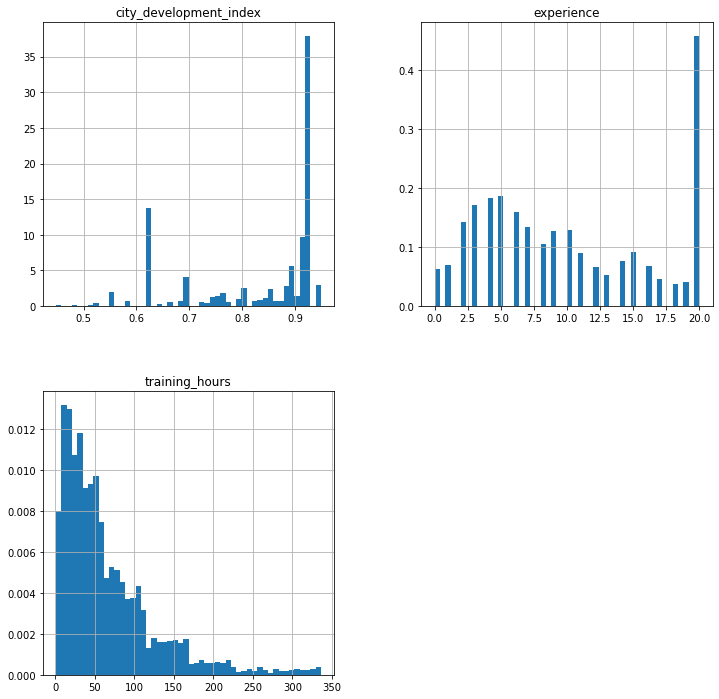

In [32]:
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show()

<AxesSubplot:>

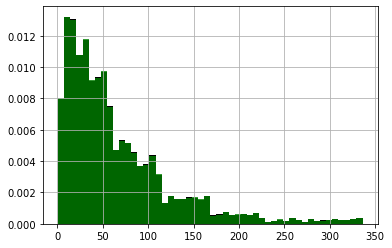

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

#orignal data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='black')

#data after cca
new_df['training_hours'].hist(bins=50, ax=ax, density=True, color='green', alpha=0.8)

In [38]:
temp = pd.concat([
    
    #percentage of observation per category, original data
    df['enrolled_university'].value_counts() / len(df),
    
    new_df['enrolled_university'].value_counts() / len(new_df)
], axis=1)

temp.columns=['original', 'cca']
temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [39]:
temp = pd.concat([
    
    #percentage of observation per category, original data
    df['education_level'].value_counts() / len(df),
    
    new_df['education_level'].value_counts() / len(new_df)
], axis=1)

temp.columns=['original', 'cca']
temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [51]:
s = 'tocacot'

In [41]:
len(s)

6

In [42]:
s[0:6]

'deepak'

In [43]:
s[0:len(s)]

'deepak'

In [45]:
s[len(s)-1]

'k'

In [52]:
s[1:-1]

'ocaco'

In [50]:
def ispa(s):
    if len(s) == 0:
        return True
    if s[0] != s[len(s)-1]:
        return False
    return ispa(s[1:-1])

print(ispa('todadot'))

True


In [53]:
s='ocaco'
s[1:-1]

'cac'

In [54]:
s = 'cac'
s[1:-1]

'a'

In [55]:
s[0]

'c'

In [56]:
s[len(s)-1]

'c'

In [57]:
s ='a'
s[1:-1]

''

In [61]:
a = [1,2,3,4]
a[1:]

[2, 3, 4]

In [59]:

len(a)

4

In [60]:
a[3]

4

In [62]:
a=[[[[[[[[[[[[3]]]]]]]]]]]]

In [63]:
a.trim()

AttributeError: 'list' object has no attribute 'trim'